<a href="https://colab.research.google.com/github/sandeepshrigondekar/TrafficLightDetection/blob/main/TLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/"

total 151274
-rw------- 1 root root    226539 Jun  9  2014 '100008253362 (1).pdf'
-rw------- 1 root root    237990 Jul 19  2014  100008253362.pdf
-rw------- 1 root root      6918 Aug 24  2014  210814EC02008317.pdf
-rw------- 1 root root    265568 Nov 19 17:53  Automation.pptx
drwx------ 2 root root      4096 Jan  2 12:46  Bosch_Dataset
-rw------- 1 root root     91081 Oct 11  2014  CAS_31082014_32371670.pdf
drwx------ 2 root root      4096 Jan 27  2020 'Colab Notebooks'
-rw------- 1 root root 150828752 Jun 21  2020  creditcard.csv
-rw------- 1 root root   3177781 Jul 14 05:51  Docs.zip
-rw------- 1 root root     18723 Sep  6  2014 'ELITE I20.XLS'
-rw------- 1 root root       151 Mar  7  2010 'General Information all tours[1].gdoc'
-rw------- 1 root root     19670 Dec 15 03:46  GYM-Data.xlsx
drwx------ 2 root root      4096 Jul 28  2019  IITB-DS-ML
drwx------ 2 root root      4096 Jan  2 12:46  .ipynb_checkpoints
drwx------ 2 root root      4096 Sep  1 22:56  LJMU-MS
drwx------ 2 root r

In [3]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet
make: Nothing to be done for 'all'.


In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-05 06:10:44--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  2.57MB/s    in 3m 0s   

2021-01-05 06:13:44 (1.31 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [6]:
#Makes a dir for darknet
%cd /content/gdrive/My\ Drive/TLD
%mkdir darknet

/content/gdrive/My Drive/TLD


In [7]:
#Copy the Darknet compiled version to Google drive
!cp -r /content/darknet /content/gdrive/My\ Drive/TLD/

In [11]:
%cd /content/gdrive/My\ Drive/TLD/darknet/
# !cp /content/gdrive/My\ Drive/TLD/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/gdrive/My Drive/TLD/darknet


In [12]:
## Some Utils
# These utils are:
# * imgShow() - Will help us to show an image in the remote VM
# * download() - Will allow you to get some file from your notebook in case you need to
# * upload() - You can upload files to your current folder on the remote VM.
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

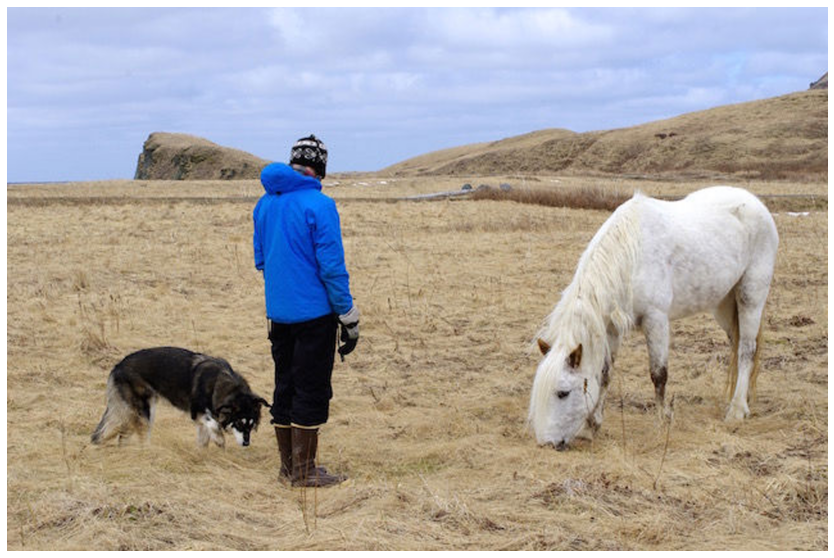

In [13]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [16]:
#Start of TLD

In [ ]:
!git clone git@github.com:bosch-ros-pkg/bstld.git

In [ ]:
!git clone https://github.com/bosch-ros-pkg/bstld.git

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb

In [ ]:
#pwd

In [ ]:
#%mkdir traffic_light_images_train

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb

In [ ]:
#pwd

In [ ]:
#%mkdir traffic_light_images_test

In [ ]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/rgb/train/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/

In [ ]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/rgb/test/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test/

In [ ]:
#%cd traffic_light_images_train 

In [ ]:
#!ls | wc -l

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test

In [ ]:
#!ls | wc -l

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb
#%mkdir traffic_light_xmls_train

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/
#%mkdir traffic_light_xmls_test

In [ ]:
%cd /content/darknet/bstld

In [ ]:
#create necessary xml files for training with YOLO. Where first argument is PATH_TO_DATASET/train.yaml and second argument is /train/traffic_light_xmls folder which we recently created
#!python bosch_to_pascal.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/train.yaml /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train

In [ ]:
 #%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train
 #!ls | wc -l

In [ ]:
#Now we have 5093 xml label files but we have to convert VOC to YOLO type labels with the script from darknet. So create a traffic_light_labels folder for train
#%mkdir traffic_light_labels_train

In [ ]:
#go back to the darknet folder and create a folder named traffic-lights. We will put our files in this folder to reach them easily
#%cd /content/darknet/

In [ ]:
%mkdir traffic-lights 
%cd traffic-lights

/content/darknet/traffic-lights


In [ ]:
!cp ../scripts/voc_label.py ../traffic-lights/bosch_voc_to_yolo_converter.py

In [ ]:
import xml.etree.ElementTree as ET
import pickle
import os
from os import listdir, getcwd
from os.path import join
import sys

sets=['traffic_lights']

classes = ["RedLeft", "Red", "RedRight", "GreenLeft", "Green", "GreenRight", "Yellow", "off"]

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(xml_path_input,file_folder,file_name):
    in_file = open('%s'%(xml_path_input))
    out_file = open('%s/%s.txt'%(file_folder,file_name), 'w')
    tree=ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

wd = getcwd()

output_folder = str(sys.argv[1])
xmls_list = str(sys.argv[2])
images_folder = str(sys.argv[3])

for image_set in sets:
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    xml_paths = open(xmls_list).read().strip().split()
    list_file = open('%s.txt'%(image_set), 'w')
    for xml_path in xml_paths:
        #print("xml path: ",xml_path)
        xml_name = xml_path.split('/')[-1]
        #print("xml name:",xml_name)
        image_name = xml_name.split('.')[0]
        #print("image name: ",image_name)
        #print(images_folder+'/%s.png\n'%(image_name))
        list_file.write(images_folder+'/%s.png\n'%(image_name))
        convert_annotation(xml_path,output_folder,image_name)
    list_file.close()

IndexError: ignored

In [ ]:
!cp ../cfg/voc.data ../traffic-lights/voc-bosch.data

In [ ]:
!cp ../data/voc.names ../traffic-lights/voc-bosch.names

In [ ]:
!mv /content/darknet/traffic-lights /content/gdrive/MyDrive/TLD